In [1]:
# use hdbscan to cluster the data
!pip install hdbscan

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 8.8 MB/s eta 0:00:00a 0:00:010m
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Obtaining dependency information for cython<3,>=0.27 from https://files.pythonhosted.org/packages/3f/d6/9eed523aeaca42acbaa3e6d3850edae780dc7f8da9df1bf6a2ceb851839c/Cython-0.29.36-py2.py3-none-any.whl.metadata
  Using cached Cython-0.29.36-py2.py3-none-any.whl.metadata (3.1 kB)
Using cached Cython-0.29.36-py2.py3-none-any.whl (988 kB)
  Created wheel for hdbscan: filename=hdbscan-0.8.33-cp310-cp310-macosx_11_0_arm64.whl size=634802 sha256=d66ec1b96c12fdeae4b7e8c3941f8949927ce17d47eaf5d10314cb585290491f
  Stored in directory: /Users/sebastiancavada/Library/Caches/pip/wheels/75/0b/3b/dc4f60b7cc455efaefb62883a7483e76f09d06ca81cf87d610
Successfully built hdbscan


In [3]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

import hdbscan

In [4]:
with open('embeddings_all.pkl', 'rb') as file:
    data = pickle.load(file)

x = data["outputs"]
y = data["labels"]

In [5]:
print(x.shape)
print(x)

torch.Size([49984, 344])
tensor([[-4.0658,  0.4799,  0.2382,  ...,  0.1069,  0.6385, -0.6550],
        [-0.6265, -0.6888,  0.3135,  ...,  0.9682,  3.7766, -1.7888],
        [ 1.8558, -0.4909,  0.0466,  ..., -0.8001, -1.6884, -2.9808],
        ...,
        [-1.7552, -2.7167,  0.0688,  ...,  0.0928, -2.6108, -1.0271],
        [-4.9407, -0.0754,  0.2270,  ..., -0.3963,  6.9203,  1.0549],
        [-4.2442,  0.6847,  0.3223,  ...,  0.0873,  0.0090,  0.5538]])


In [258]:
# normalize the data

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x = scaler.fit_transform(x)


In [261]:
x_1 = np.array(x[:5000, :], dtype=np.double)
print(x_1.shape)



(5000, 344)


In [265]:
#do PCA with 100 dimensions

from sklearn.decomposition import PCA
pca = PCA(n_components=100)
x_pca = pca.fit_transform(x_1)
print(x_pca.shape)

(5000, 100)


/Users/sebastiancavada/anaconda3/envs/ai701/lib/python3.10/site-packages/hdbscan/flat.py:155: UserWarning: Cannot predict more than 9 with cluster selection method 'eom'. Changing to method 'leaf'...
  warn(f"Cannot predict more than {max_eom_clusters} with cluster "
/Users/sebastiancavada/anaconda3/envs/ai701/lib/python3.10/site-packages/hdbscan/flat.py:703: UserWarning: HDBSCAN can only compute 13 clusters. Setting n_clusters to 13...
  warn(f"HDBSCAN can only compute {len(lambdas)+1} clusters. "


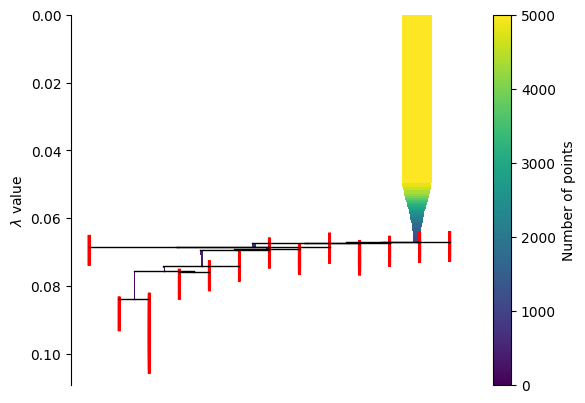

In [306]:
from hdbscan.flat import (HDBSCAN_flat,
                          approximate_predict_flat,
                          membership_vector_flat,
                          all_points_membership_vectors_flat)
import seaborn as sns

clusterer = HDBSCAN_flat(x_pca,
                         cluster_selection_method='eom',
                         n_clusters=100, min_cluster_size=10)

clusterer.condensed_tree_.plot(select_clusters=True,
                                 selection_palette=sns.color_palette('deep', 8))
plt.show()


In [307]:
print(np.unique(clusterer.labels_, return_counts=True))

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([4607,   28,   27,   27,   54,   12,   22,   48,   23,   10,   20,
         22,   30,   70]))


In [308]:
labels = clusterer.labels_
print(np.unique(labels, return_counts=True))

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]), array([4607,   28,   27,   27,   54,   12,   22,   48,   23,   10,   20,
         22,   30,   70]))


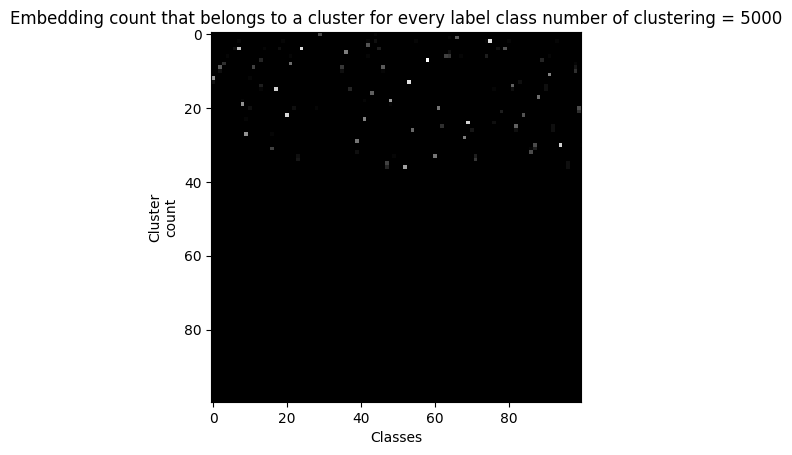

In [305]:
a = np.zeros((100,100))

#print(a)

for i, cluster in enumerate(labels):
    if(cluster == -1):
        continue
    else:
        a[cluster][y[i]] += 1

plt.xlabel("Classes")
plt.ylabel("Cluster\ncount")
plt.title("Embedding count that belongs to a cluster for every label class number of clustering = " + str(labels.shape[0]))
plt.imshow(a,cmap='Greys_r')